# SegNet Test

## Load Model

In [1]:
from model_segnet import SegNet
import torch
from image_dataset import ImageData
from torch.utils.data import DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

model = SegNet(4).to(device)
model.load_state_dict(torch.load('best_weight2.pth'))
model.eval()

Using cuda device


SegNet(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, 

## Load Data

In [2]:
data_test = ImageData('test')
test_dataloader = DataLoader(data_test, batch_size=1, shuffle=False)



## Predict

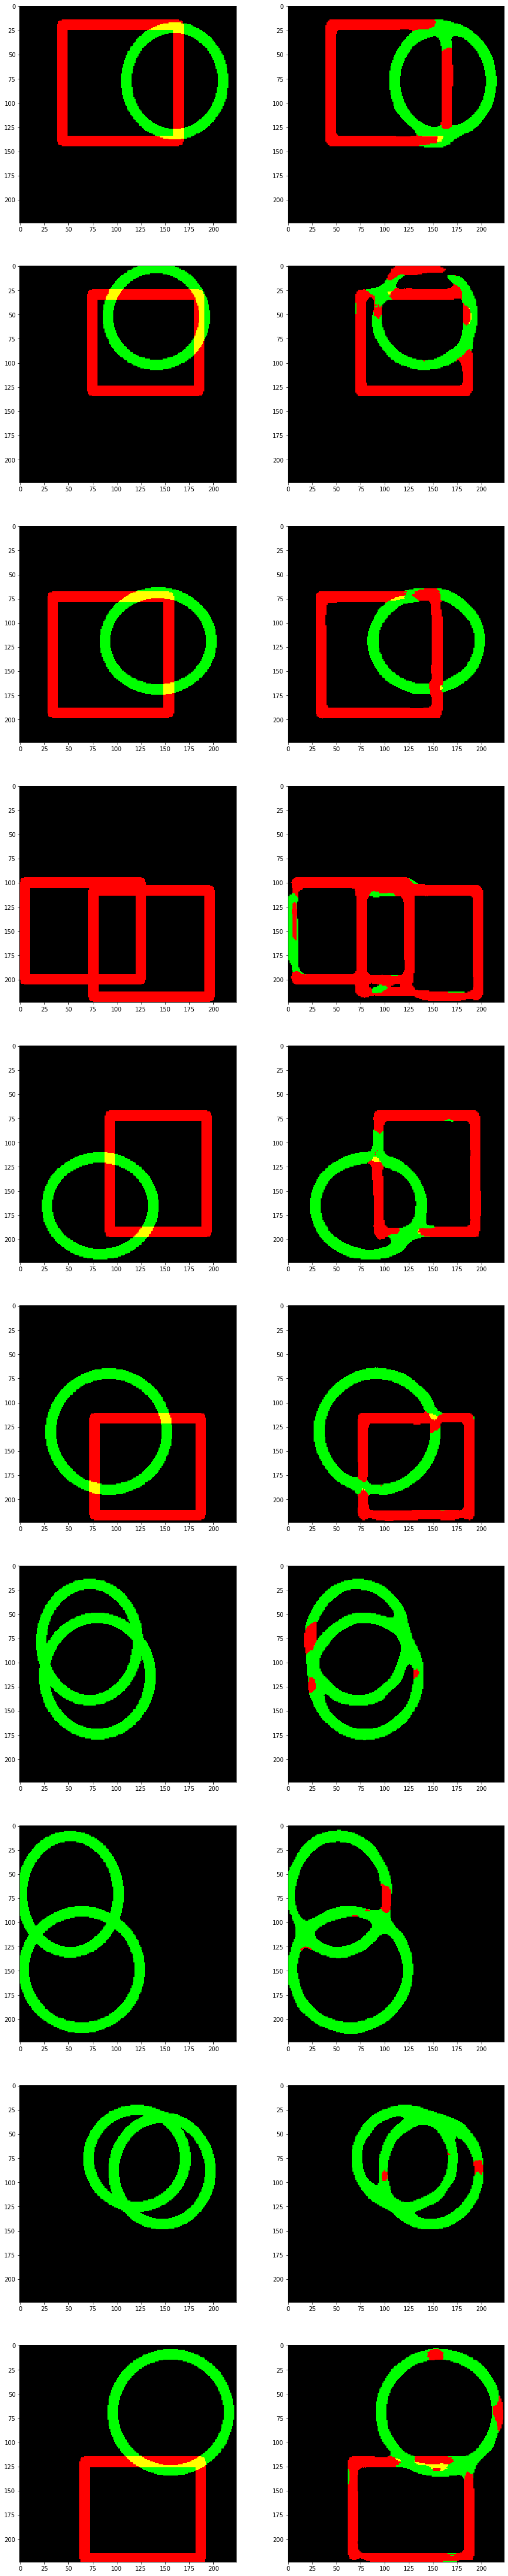

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure("prediction")
plt.rcParams['figure.figsize'] = [15, 50]  # width, height in inches.

image_to_show = 10

def convert_into_rgb(y):
    color_map = [[0, 0, 0],[0, 255, 0], [255, 0, 0], [255, 255, 0]]
    _, height, width = y.shape
    
    image_rgb = np.zeros((height, width, 3), dtype=np.uint8)
    
    for idx_cls in range(1, 4):
        idx = np.where(y.reshape(height, width) == idx_cls)
        image_rgb[idx[0], idx[1], :] = color_map[idx_cls]

    return image_rgb

idx_image = 0
for X, y in test_dataloader:
    X = X.to(device)
    pred = model(X)

    y_pred = torch.argmax(pred, dim=1)
    _, height, width = y.shape

    y = y.numpy()
    image_y = convert_into_rgb(y)
    plt.subplot(image_to_show, 2, idx_image*2 + 1)    
    plt.imshow(image_y)

    y_pred = y_pred.cpu().numpy()
    image_y_pred = convert_into_rgb(y_pred)
    plt.subplot(image_to_show, 2, idx_image*2 + 2)
    plt.imshow(image_y_pred)

    idx_image += 1
    if idx_image >= image_to_show:
        break
